In [157]:
import pandas as pd

file_name = 'data/data.xlsx'
df = pd.read_excel(io=file_name)

df = df[:235]
df = df.drop(labels=['My scale:', 'Dodatkowe pytanie:', 'Funkcjonowanie społeczne', 'Szczegóły o pornografii',
                     'Metryczka', 'PPCS:', 'Extreme score'], axis=1)

df.columns = 'time', 'extreme_1', 'extreme_2', 'extreme_3', 'extreme_4', 'extreme_5', 'extreme_6', 'extreme_7', \
             'extreme_8', 'extreme_score', 'PPCS_1', 'PPCS_2', 'PPCS_3', 'PPCS_4', 'PPCS_5', \
             'PPCS_6', 'PPCS_score', 'PPCS_7', 'well-being', 'father_relations', 'mother_relations', \
             'friends_relations', 'romantic_life', 'sexual_life', 'reenacting', 'weekly_sessions', 'session_time', \
             'weekly_minutes', 'gender', 'age', 'faith_status', 'education', 'relationship_status', 'lives_with', 'occupation'


in_relationship = []
believes_in_god = []

for item in df['relationship_status']:
    if item in ['Zaręczony/zaręczona', 'W związku małżeńskim', 'W związku', 'Kochanka']:
        in_relationship.append(True)
    else:
        in_relationship.append(False)

for item in df['faith_status']:
    if item == 'Nie':
        believes_in_god.append(False)
    else:
        believes_in_god.append(True)

df['in_relationship'] = in_relationship
df['believes_in_god'] = believes_in_god

In [241]:
argumnets_list = []

for i in range(len(df)):
  index_tuple = df['extreme_score'][i], df['well-being'][i], df['reenacting'][i], df['age'][i], df['sexual_life'][i],\
                df['gender'].replace({'Mężczyzna':1, 'Kobieta':0})[i], df['believes_in_god'][i].astype(int),\
                df['PPCS_score'][i], df['friends_relations'][i], df['in_relationship'][i].astype(int), df['weekly_sessions'][i],\
                df['session_time'][i]
                
  argumnets_list.append(index_tuple)

print(argumnets_list[0])

(2.3080593849416755, 1, 5, 22, 1, 0, 0, 11, 7, 0, 3, 30)


In [242]:
import numpy as np
X = np.array(argumnets_list)
y = np.array(df['romantic_life'])

print(X.shape)
print(y.shape)

(235, 12)
(235,)


In [243]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR, SVC

clf = make_pipeline(RobustScaler(), SVR(kernel='linear', gamma='auto'))
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))


0.6131955800871763


In [245]:
results = clf.predict(X_test)
from scipy.stats import pearsonr
print(pearsonr(results, y_test)[0])

0.8329194330455443


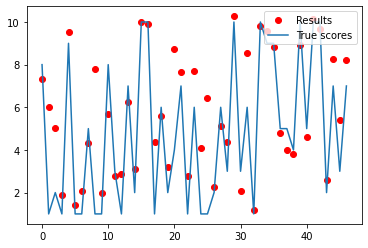

In [268]:
import matplotlib.pyplot as plt

plot_range = range(len(y_test))
plt.plot(plot_range, results, 'ro', label='Results')
plt.plot(plot_range, y_test, label='True scores')
plt.legend(loc='upper right')